In [7]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2

In [8]:
dataset_path = os.listdir('/content/drive/MyDrive/Room Dataset/archive/House_Room_Dataset')

room_types = os.listdir('/content/drive/MyDrive/Room Dataset/archive/House_Room_Dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))

['Dinning', 'Kitchen']
Types of rooms found:  2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [9]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('/content/drive/MyDrive/Room Dataset/archive/House_Room_Dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('/content/drive/MyDrive/Room Dataset/archive/House_Room_Dataset' + '/' +item) + '/' + room))
    print(rooms)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
#print(rooms_df.tail())


  room type                                              image
0   Dinning  /content/drive/MyDrive/Room Dataset/archive/Ho...
1   Dinning  /content/drive/MyDrive/Room Dataset/archive/Ho...
2   Dinning  /content/drive/MyDrive/Room Dataset/archive/Ho...
3   Dinning  /content/drive/MyDrive/Room Dataset/archive/Ho...
4   Dinning  /content/drive/MyDrive/Room Dataset/archive/Ho...


In [11]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)


Total number of rooms in the dataset:  2123
rooms in each category: 
Dinning    1158
Kitchen     965
Name: room type, dtype: int64


In [12]:
path = '/content/drive/MyDrive/Room Dataset/archive/House_Room_Dataset/'


im_size = 300

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
train_X = np.asarray(images)
train_Y = pd.DataFrame(labels)

In [15]:
train_Y.head()

,room type
0,Dinning
1,Dinning
2,Dinning
3,Dinning
4,Dinning


In [13]:
train_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2123 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


In [14]:
train_Y.rename(columns={0:'room type'},inplace=True)

[Text(0, 0, 'Dinning'), Text(0, 0, 'Kitchen')]

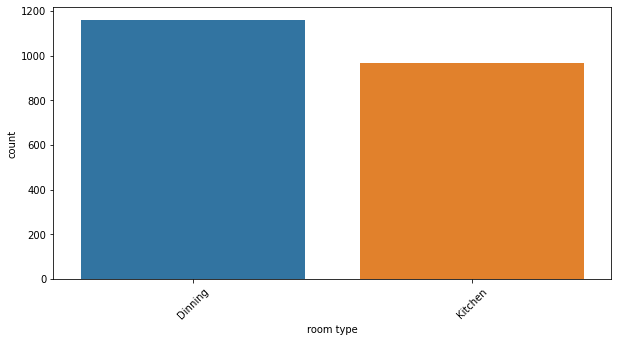

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt                        
%matplotlib inline 
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=train_Y,
    x='room type'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [17]:
train_Y['room type'].value_counts()

Dinning    1158
Kitchen     965
Name: room type, dtype: int64

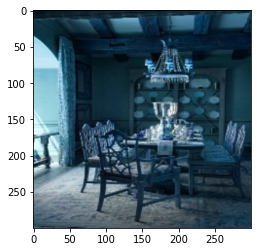

In [18]:
plt.imshow(train_X[1])

In [19]:
train_X.shape #2123 images, width,height: 300, RGB color 3 channel

(2123, 300, 300, 3)

In [20]:
#Step 2. Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
le.fit(train_Y['room type'])
encoded_labels = le.transform(train_Y['room type'])
train_label = np_utils.to_categorical(encoded_labels)

In [21]:
train_label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [22]:
#Train Data & Validation Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_X, train_label,test_size=0.2,random_state=42, stratify=train_label)

In [23]:
#Normalization
# Normalization of the Image Data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255 

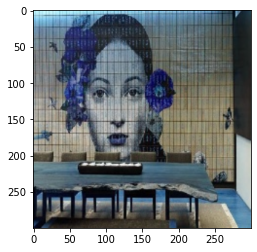

In [24]:
plt.imshow(X_train[0])

In [25]:
#ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen.fit(train_X)

In [26]:
# Model of CNN
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [27]:
model = Sequential()
model.add(Conv2D(input_shape=(300,300,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [28]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                    

In [30]:
##Specify Lass and Optimizer
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [34]:
#Fit Mode
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=8), 
                    epochs=10, validation_data=(X_test, y_test),   
                    callbacks = [early, checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
213/213 [==============================] - ETA: 0s - loss: 0.8354 - accuracy: 0.5430
Epoch 1: val_accuracy improved from -inf to 0.54588, saving model to vgg16_1.h5
213/213 [==============================] - 98s 388ms/step - loss: 0.8354 - accuracy: 0.5430 - val_loss: 0.6893 - val_accuracy: 0.5459
Epoch 2/10
213/213 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5371
Epoch 2: val_accuracy did not improve from 0.54588
213/213 [==============================] - 63s 294ms/step - loss: 0.6913 - accuracy: 0.5371 - val_loss: 0.6894 - val_accuracy: 0.5459
Epoch 3/10
213/213 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.5453
Epoch 3: val_accuracy did not improve from 0.54588
213/213 [==============================] - 64s 300ms/step - loss: 0.6897 - accuracy: 0.5453 - val_loss: 0.6890 - val_accuracy: 0.5459
Epoch 4/10
213/213 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5453
Epoch 4: val_accuracy did not im

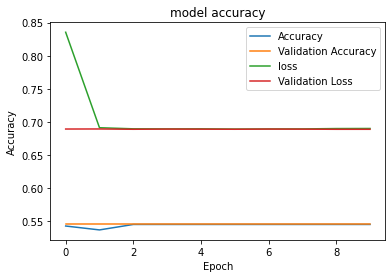

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [36]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
#print ("Test Accuracy = " + str(preds[1]))

14/14 [==============================] - 4s 261ms/step - loss: 0.6889 - accuracy: 0.5459
Loss = 0.6889331936836243


Input image shape: (1, 300, 300, 3)


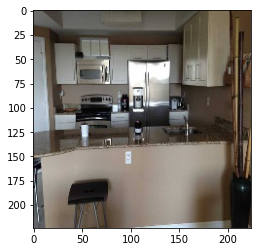

In [37]:
from keras.preprocessing import image
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
img_path = '/content/drive/MyDrive/Room Dataset/archive/House_Room_Dataset/Kitchen/kitchen_1.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [38]:
print(model.predict(x))

[[0.54483277 0.45516723]]
